In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ottdata.csv')

In [4]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [5]:
df.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [7]:
df.shape

(1000, 8)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


In [10]:
df.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


In [11]:
df['genre'].value_counts()

,count
genre,
Others,255
Comedy,114
Thriller,113
Drama,109
Romance,105
Sci-Fi,102
Horror,101
Action,101


In [12]:
df['dayofweek'].value_counts()

,count
dayofweek,
Friday,369
Wednesday,332
Thursday,97
Saturday,88
Sunday,67
Monday,24
Tuesday,23


In [13]:
df['season'].value_counts()

,count
season,
Winter,257
Fall,252
Spring,247
Summer,244


In [14]:
df['major_sports_event'].value_counts()

,count
major_sports_event,
0,600
1,400


In [15]:
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

In [16]:
def histogram_boxplot(data, feature, figsize=(15,10), kde=False, bins= None):
  f2, (ax_box2, ax_hist2)= plt.subplots(nrows=2,
                                        sharex=True,
                                        gridspec_kw={'height_ratios':(0.25,0.75)},
                                        figsize=figsize)
  sns.boxplot(data= data, x= feature, ax= ax_box2, showmeans= True, color='lightgrey')
  sns.histplot(data= data,
               x=feature,
               ax=ax_hist2,
               kde=kde,
               bins=bins
               )if bins else sns.histplot(data= data,
                                          x=feature,
                                          ax=ax_hist2,
                                          kde=kde)
  ax_hist2.axvline(data[feature].mean(), color='white', linestyle='--')
  ax_hist2.axvline(data[feature].median(), color='red', linestyle='-')

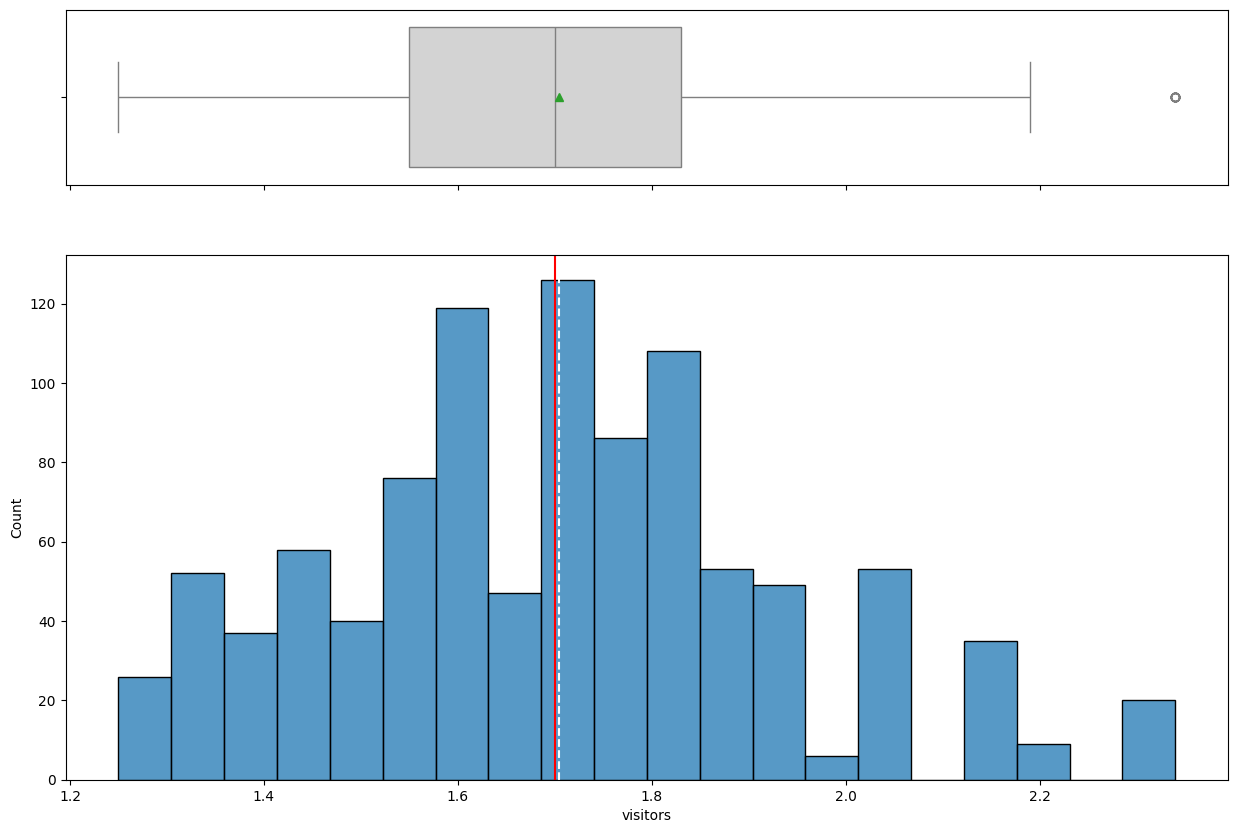

In [17]:
histogram_boxplot(df, 'visitors')

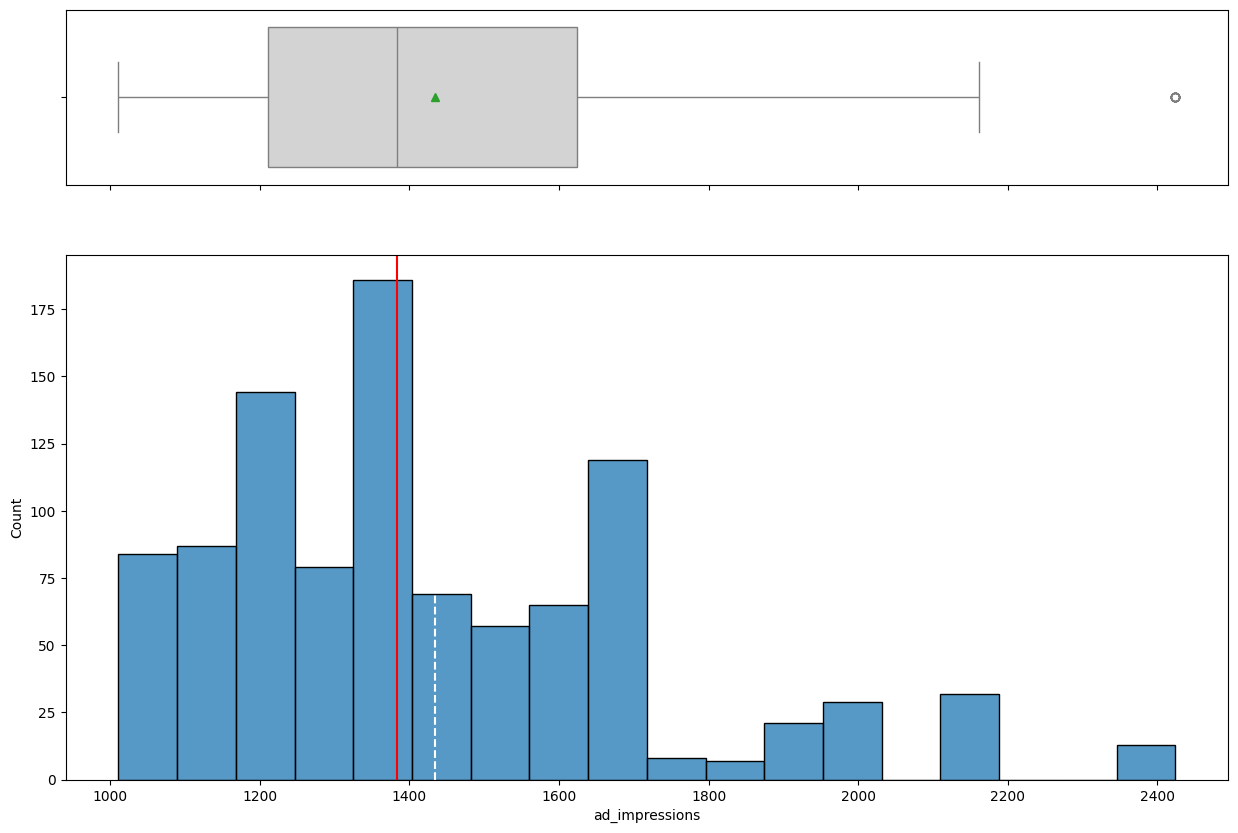

In [18]:
histogram_boxplot(df, 'ad_impressions')

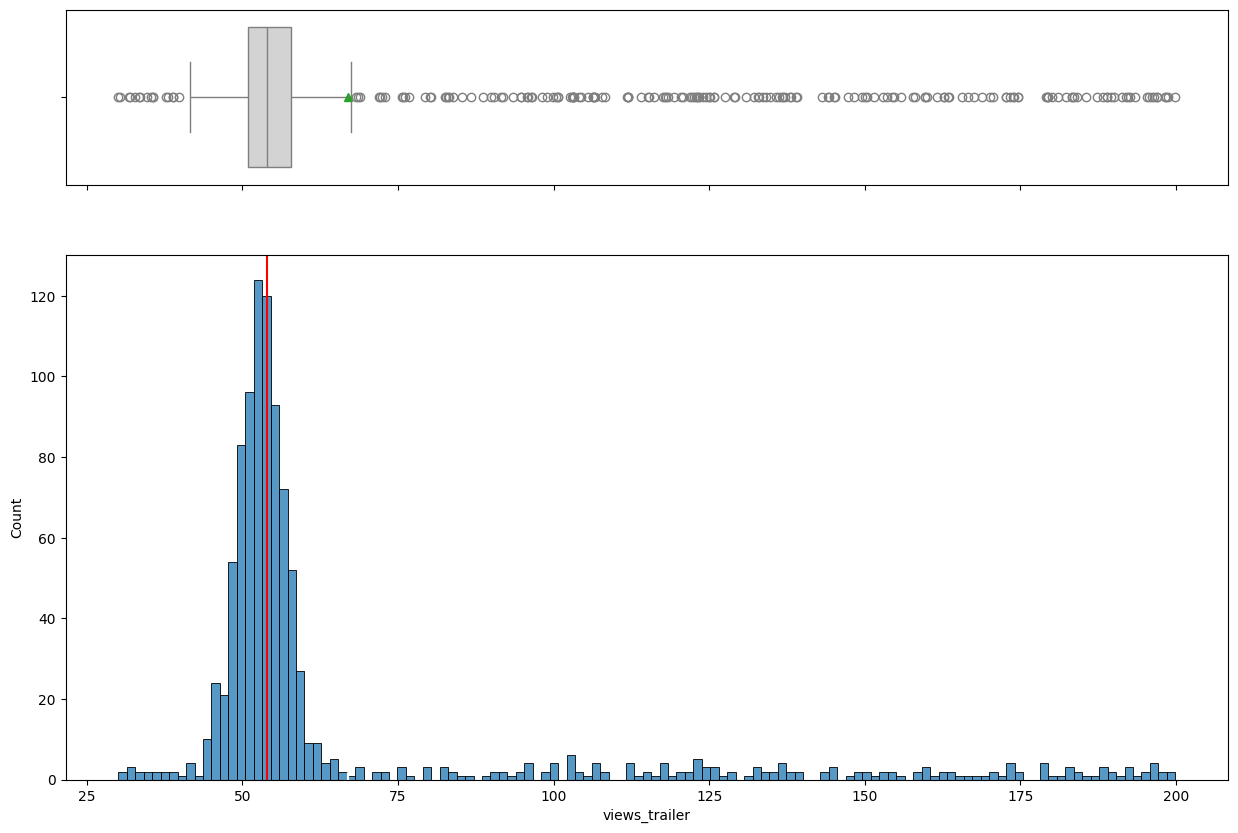

In [19]:
histogram_boxplot(df, 'views_trailer')

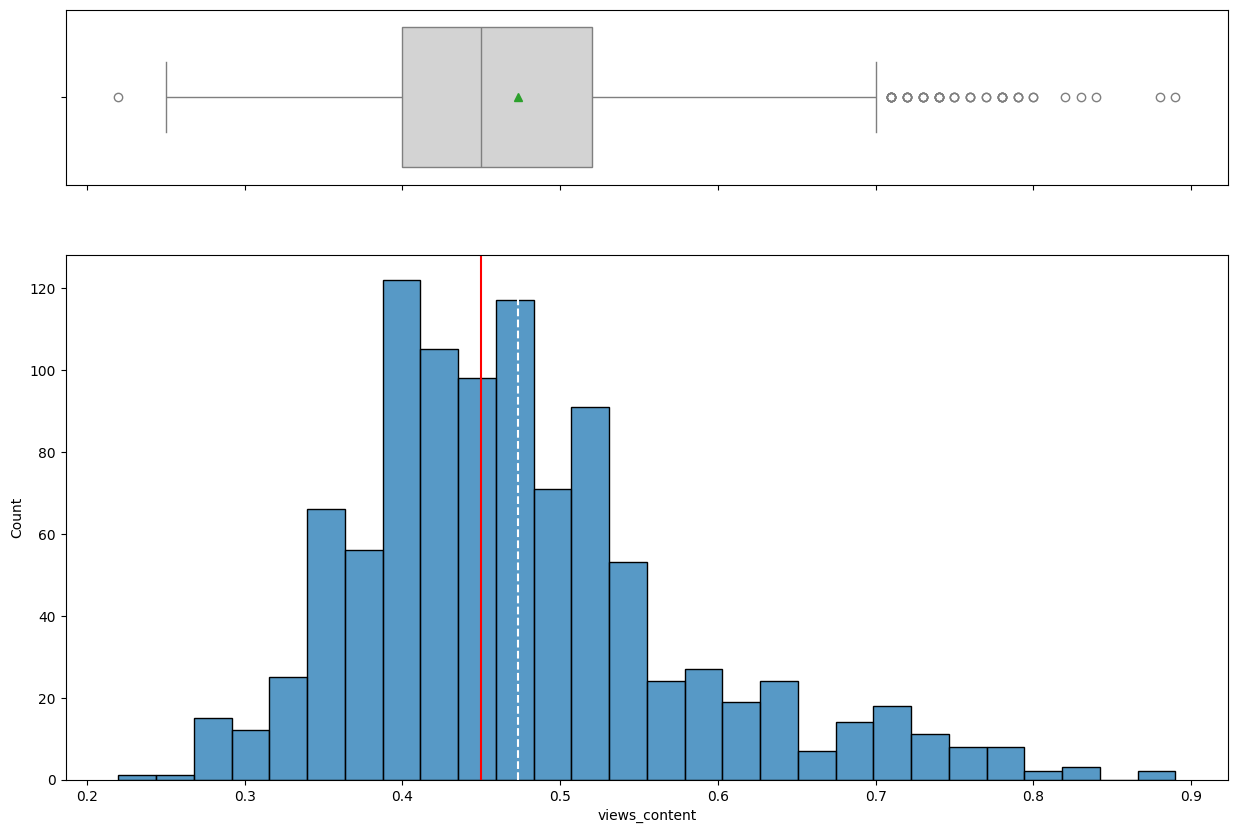

In [20]:
histogram_boxplot(df, 'views_content')

In [21]:
def labeled_barplot(data, feature, perc= False, n= None):
  total= len(data[feature])
  count= data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count+2, 7))
  else:
    plt.figure(figsize= (n+2, 7))
  plt.xticks(rotation=90, fontsize=15)
  ax= sns.countplot(
      data= data,
      x= feature,
      hue= feature,
      palette= 'Paired',
      order=data[feature].value_counts().index[:n]
  )
  for p in ax.patches:
    if perc== True:
      label="{:.1f}%".format(100*p.get_height()/total)
    else:
      label= p.get_height()
    x= p.get_x()+p.get_width()/2
    y= p.get_height()
    ax.annotate(
        label,
        (x,y),
        ha= 'center',
        va='center',
        size=12,
        xytext=(0,5),
        textcoords='offset points'
    )
  plt.show()

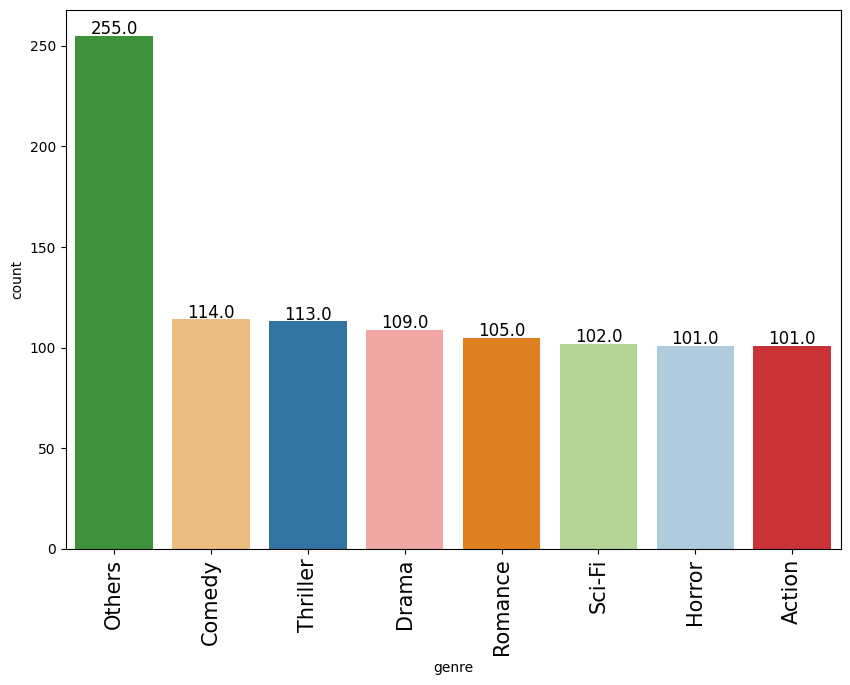

In [22]:
labeled_barplot(df, 'genre')

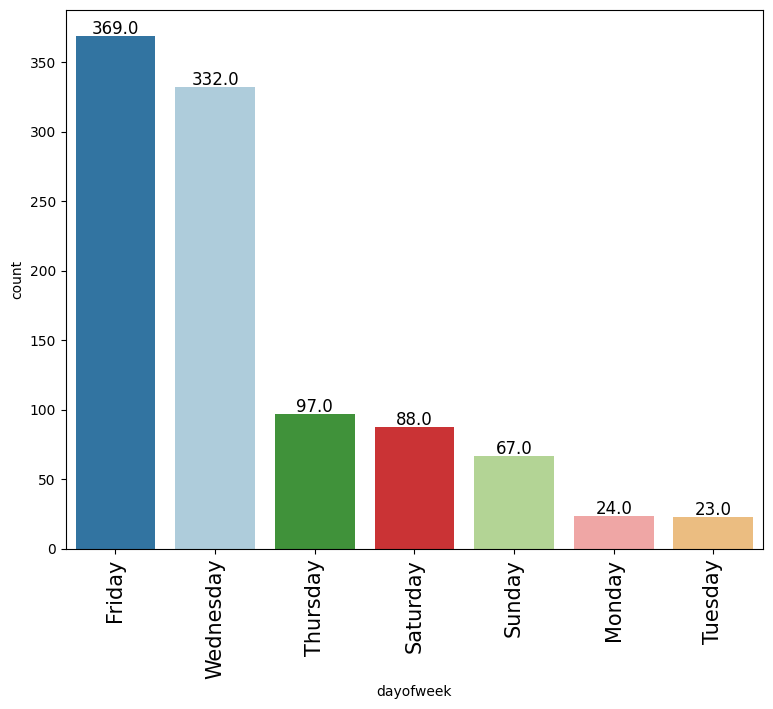

In [23]:
labeled_barplot(df, 'dayofweek')

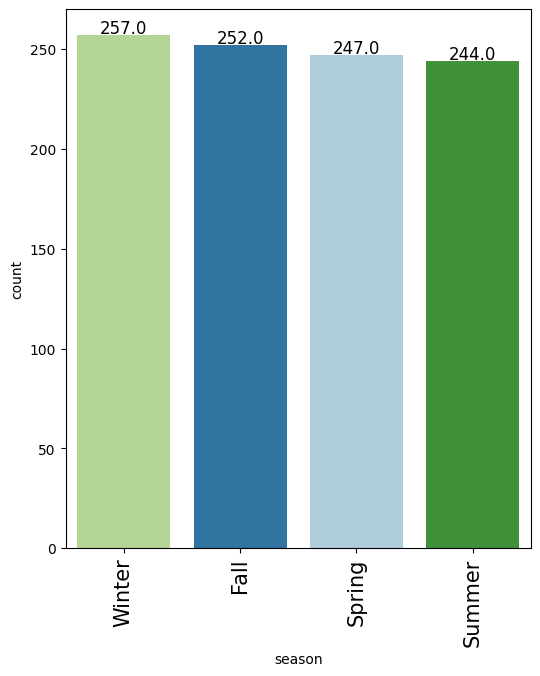

In [24]:
labeled_barplot(df,'season')

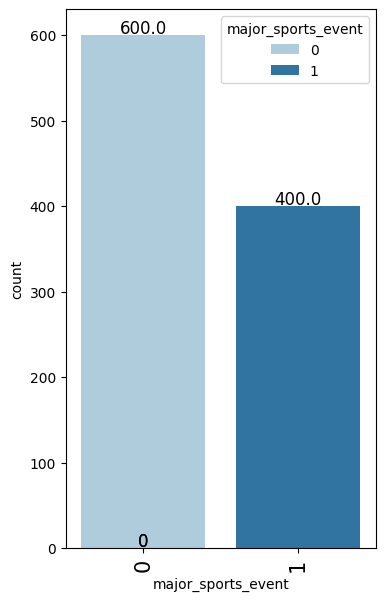

In [25]:
labeled_barplot(df,'major_sports_event')

# Heatmap & Pairplot

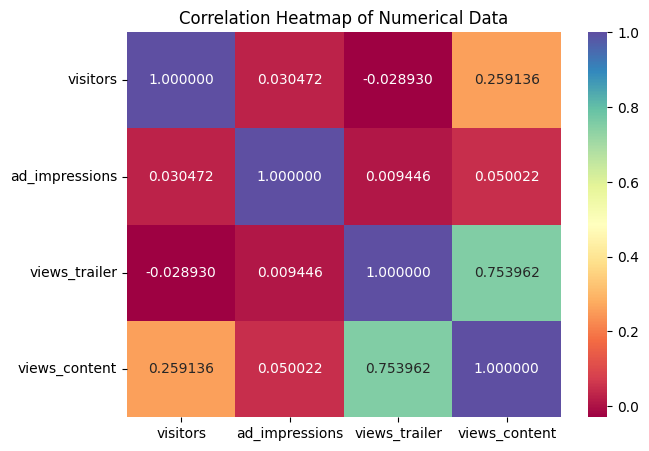

In [26]:
corr_matrix= df[['visitors', 'ad_impressions','views_trailer', 'views_content']].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='2f')
plt.title('Correlation Heatmap of Numerical Data')
plt.show()

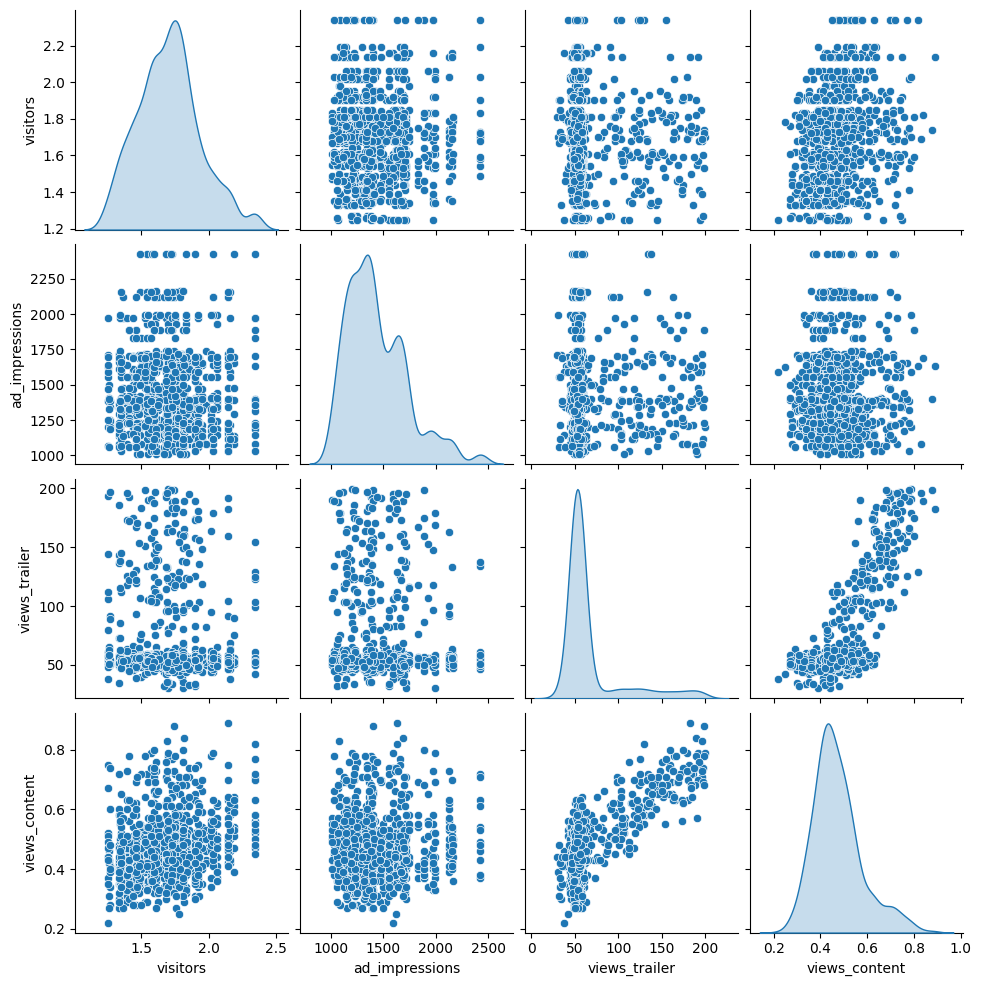

In [27]:
sns.pairplot(df[['visitors', 'ad_impressions','views_trailer', 'views_content']],diag_kind='kde')
plt.show()

In [28]:
def bivariate_analysis(data, num_col):
  sns.lmplot(data=data, x=num_col, y='views_content', line_kws={'color':'red'})
  plt.title(f'Linear relationship {num_col} vs views_content')
  plt.show()

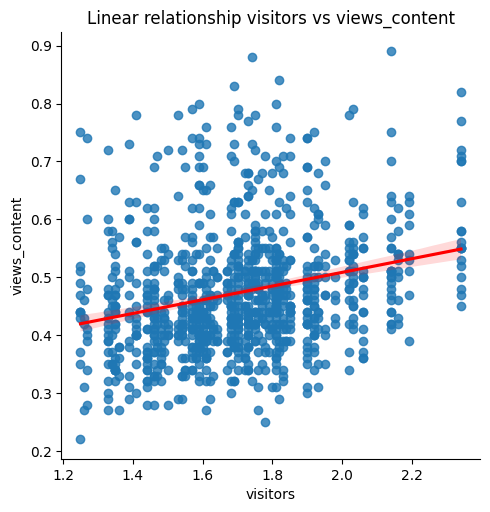

In [29]:
bivariate_analysis(df, 'visitors')

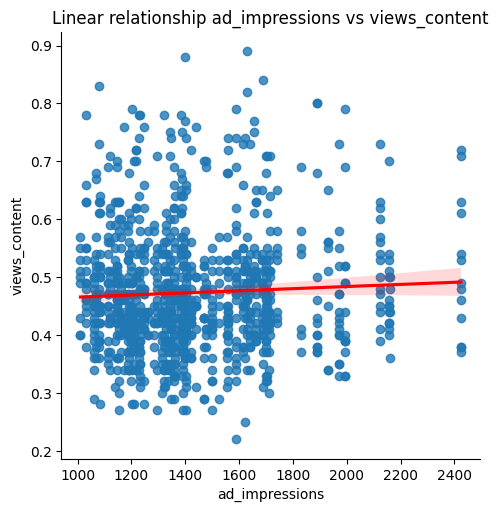

In [30]:
bivariate_analysis(df, 'ad_impressions')

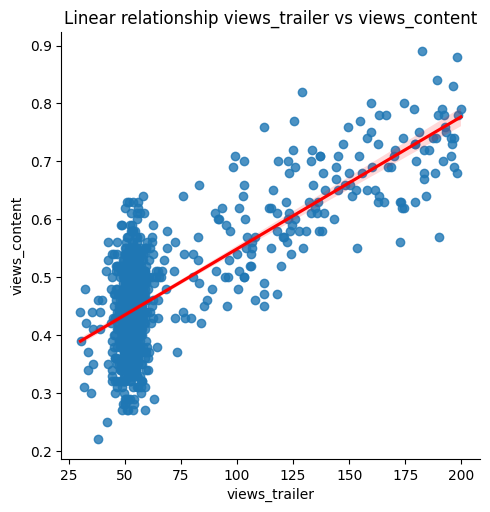

In [31]:
bivariate_analysis(df, 'views_trailer')

In [32]:
def categorical_vs_numerical(data, cat_col):
  sns.boxplot(data= data, x= cat_col, y='views_content', color='lightgreen', showmeans=True)
  plt.show()

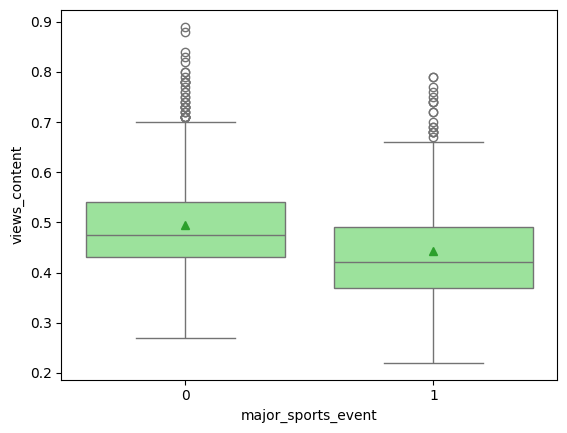

In [33]:
categorical_vs_numerical(df, 'major_sports_event')

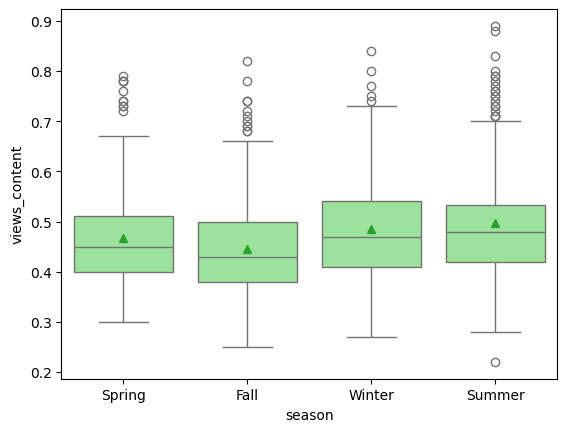

In [34]:
categorical_vs_numerical(df,'season')

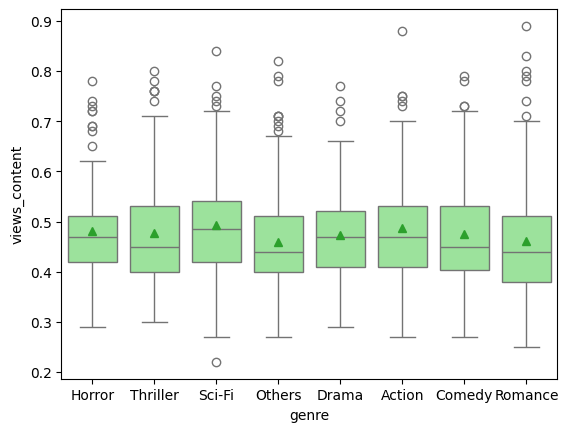

In [35]:
categorical_vs_numerical(df, 'genre')

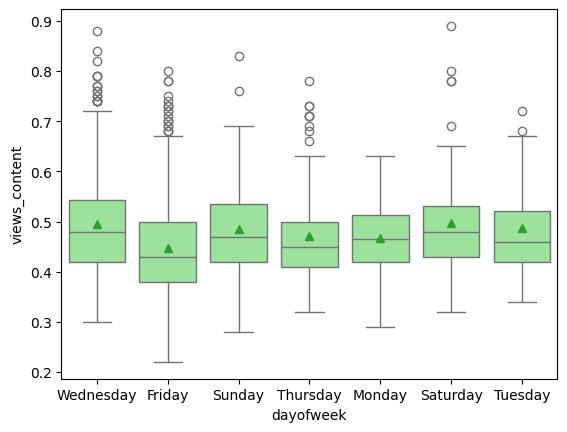

In [36]:
categorical_vs_numerical(df, 'dayofweek')

# Model Building

In [37]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [38]:
X=df.drop(['views_content'], axis= 1)
y= df['views_content']

In [39]:
X.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83


In [72]:
y.head()

,views_content
0,0.51
1,0.32
2,0.39
3,0.44
4,0.46


In [40]:
cat_cols=X.select_dtypes(include=['object']).columns.tolist()
cat_cols

['genre', 'dayofweek', 'season']

In [41]:
X=pd.get_dummies(X,
                 columns= cat_cols,
                 drop_first= True).astype(float)

In [42]:
X.head()

,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [44]:
print(f'Number of rows in train data:{x_train.shape}')
print(f'Number of rows in test data:{x_test.shape}')

Number of rows in train data:(700, 20)
Number of rows in test data:(300, 20)


In [45]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)
olsmodel1= sm.OLS(y_train,x_train).fit()

In [46]:
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          1.32e-215
Time:                        12:41:08   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [48]:
def mape_score(targets, predictions):
  return np.mean(np.abs(targets-predictions)/targets)*100

In [49]:
def model_performance_regression(model, predictors, target):
  pred= model.predict(predictors)
  if pred.dtype!= 'float64':
    pred= pred.astype('float64')

  rsme=np.sqrt(mean_squared_error(target, pred))
  mae= mean_absolute_error(target, pred)
  mape= mape_score(target, pred)
  r2= r2_score(target, pred)
  adjr2= adj_r2_score(predictors, target, pred)

  df_pref= pd.DataFrame(
      {
          'RSME': rsme,
          'MAE': mae,
          'MAPE': mape,
          'R squared': r2,
          'Adj R squared': adjr2,
      },
      index=[0]
  )
  return df_pref

In [50]:
olsmodel1_perf_train= model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_perf_train

,RSME,MAE,MAPE,R squared,Adj R squared
0,0.04853,0.038197,8.55644,0.791616,0.785162


In [51]:
olsmodel1_perf_test= model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_perf_test

,RSME,MAE,MAPE,R squared,Adj R squared
0,0.050603,0.040782,9.030464,0.766447,0.748804


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
def checking_vif(predictors):
  vif=pd.DataFrame()
  vif['feature']= predictors.columns
  vif['VIF']=[
      variance_inflation_factor(predictors.values,i)
      for i in range(len(predictors.columns))
  ]
  return vif

In [54]:
checking_vif(x_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


In [55]:
predictors= x_train.copy()
cols= predictors.columns.tolist()
max_p_value= 1

while len(cols)>0:
  x_train_aux= predictors[cols]
  model= sm.OLS(y_train, x_train_aux).fit()
  p_values = model.pvalues
  max_p_value= max(p_values)
  feature_with_p_max= p_values.idxmax()
  if max_p_value>0.05:
    cols.remove(feature_with_p_max)
  else:
    break

selected_features= cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [56]:
x_train2= x_train[selected_features]
x_test2= x_test[selected_features]

In [57]:
olsmodel2= sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          7.03e-224
Time:                        12:41:08   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [58]:
olsmodel2_perf_train= model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_perf_train

,RSME,MAE,MAPE,R squared,Adj R squared
0,0.048841,0.038385,8.595246,0.788937,0.785251


In [59]:
olsmodel2_perf_test= model_performance_regression(olsmodel2, x_test2, y_test)
olsmodel2_perf_test

,RSME,MAE,MAPE,R squared,Adj R squared
0,0.051109,0.041299,9.177097,0.761753,0.751792


In [60]:
df_pred= pd.DataFrame()
df_pred['Actual Values']= y_train
df_pred['Fitted Values']= olsmodel2.fittedvalues
df_pred['Residuals']=olsmodel2.resid

In [61]:
df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


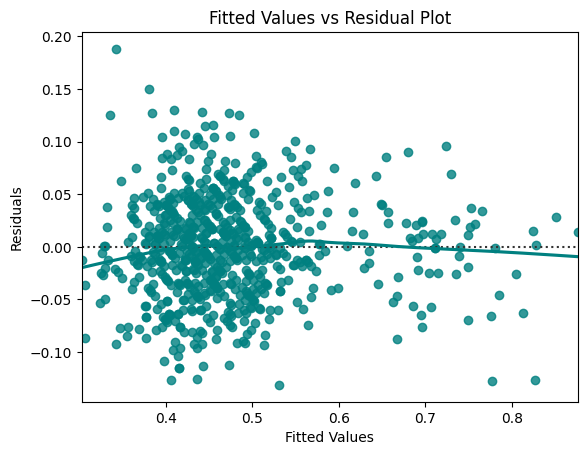

In [62]:
sns.residplot(
    data=df_pred, x='Fitted Values', y='Residuals', color='teal', lowess=True
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residual Plot')
plt.show()

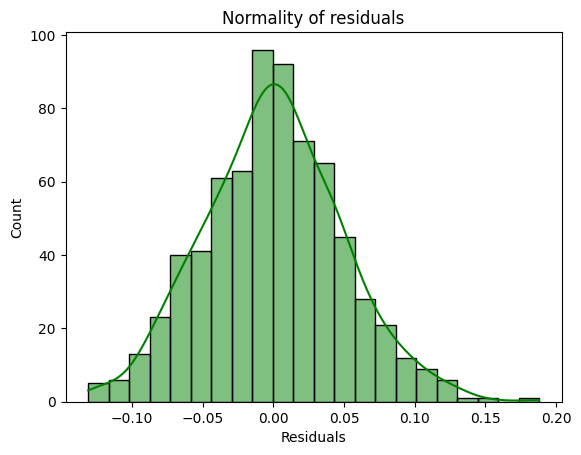

In [63]:
sns.histplot(data=df_pred, x='Residuals', kde=True, color='Green')
plt.title('Normality of residuals')
plt.show()

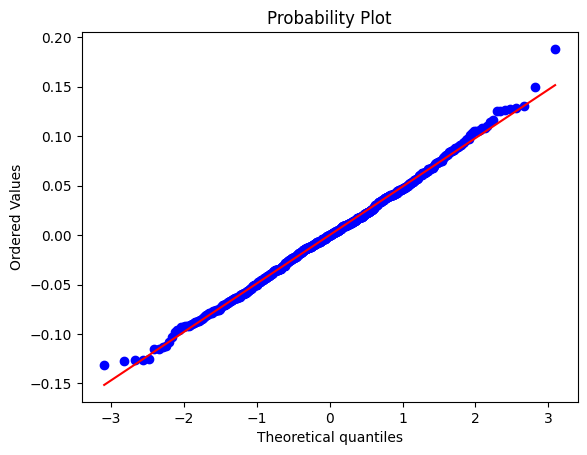

In [64]:
import pylab
stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab)
plt.show()

In [65]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=np.float64(0.9973155427169242), pvalue=np.float64(0.31085896470071894))

In [66]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', np.float64(1.1313612904200752)),
 ('p-value', np.float64(0.12853551819087372))]

In [67]:
pred = olsmodel2.predict(x_test2)
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


In [68]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [69]:
olsmodel_final= sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          7.03e-224
Time:                        12:41:09   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [70]:
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

,RSME,MAE,MAPE,R squared,Adj R squared
0,0.048841,0.038385,8.595246,0.788937,0.785251


In [71]:
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

,RSME,MAE,MAPE,R squared,Adj R squared
0,0.051109,0.041299,9.177097,0.761753,0.751792
